In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import io
from sklearn.svm import SVC
%matplotlib inline

In [2]:
Class1_name = 'ClassificationDataForNEONTeam/SarahGClass1.mat'
Class2_name = 'ClassificationDataForNEONTeam/SarahGClass2.mat'
Class3_name = 'ClassificationDataForNEONTeam/SarahGClass3.mat'

In [3]:
# Read in data
Class1_data = io.loadmat(Class1_name)
Class2_data = io.loadmat(Class2_name)
Class3_data = io.loadmat(Class3_name)

In [4]:
# Show list of keys
Class1_data.keys()

dict_keys(['SarahGClass1', '__header__', '__globals__', '__version__'])

In [5]:
# Read in data per class and horizontally concatenate to create training and validation set
X = Class1_data['SarahGClass1']
Class1_Training = np.concatenate((X[0,0],X[1,0],X[2,0],X[3,0],X[4,0],X[5,0],X[6,0],X[7,0],X[8,0],X[9,0]),axis=1)
Class1_Validation = np.concatenate((X[10,0],X[11,0],X[12,0],X[13,0],X[14,0]),axis=1)

X = Class2_data['SarahGClass2']
Class2_Training = np.concatenate((X[0,0],X[1,0],X[2,0],X[3,0],X[4,0],X[5,0],X[6,0],X[7,0],X[8,0],X[9,0]),axis=1)
Class2_Validation = np.concatenate((X[10,0],X[11,0],X[12,0],X[13,0],X[14,0]),axis=1)

X = Class3_data['SarahGClass3']
Class3_Training = np.concatenate((X[0,0],X[1,0],X[2,0],X[3,0],X[4,0],X[5,0],X[6,0],X[7,0],X[8,0],X[9,0]),axis=1)
Class3_Validation = np.concatenate((X[10,0],X[11,0],X[12,0],X[13,0],X[14,0]),axis=1)

## Check the data with a nice pretty plot

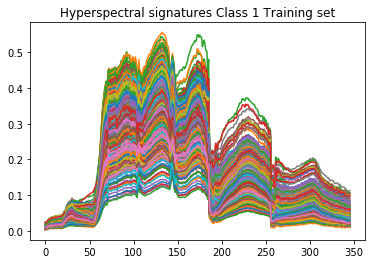

In [6]:
plt.figure()
plt.plot(range(0,346),Class1_Training)
plt.title('Hyperspectral signatures Class 1 Training set');

In [7]:
# prepare data for SVc classification between class 1 and class 2
# Concatenate class 1 and class 2
# Training
AllSamps = np.concatenate((Class1_Training,Class2_Training),axis=1)
AllSamps = AllSamps.T
NP1 = int(Class1_Training.shape[1])
NP2 = int(Class2_Training.shape[1])
# Validation
ValidSamps = np.concatenate((Class1_Validation,Class2_Validation),axis=1)
ValidSamps = ValidSamps.T
NPV1 = int(Class1_Validation.shape[1])
NPV2 = int(Class2_Validation.shape[1])

# need a 1d array of 1 and -1 of lenghts np1+np2
# Training
Target = np.ones((NP1+NP2,1))
Target[:NP1] = -1
Targets = np.ravel(Target)
# Validation
Targets_Val = np.ones((NPV1+NPV2,1))
Targets_Val[:NPV1]=-1
Targets_Val=np.ravel(Targets_Val)


In [8]:
# Initialize the SVC
InitsSVC = SVC(C=400)

In [9]:
# Train the classifier
TrainedSVC_Class_1_2=InitsSVC.fit(AllSamps,Targets)

In [11]:
# Check the classifier for the training data using the predict function
y = TrainedSVC_Class_1_2.predict(AllSamps)

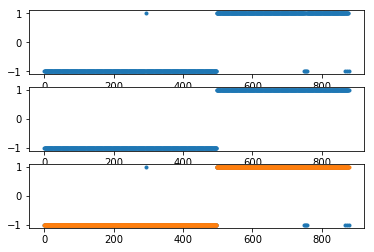

In [12]:
# Make a figure of the results of the classifier for training set
plt.figure()
plt.subplot(311)
plt.plot(y,".")
plt.subplot(312)
plt.plot(Target,".")
plt.subplot(313)
plt.plot(y,".")
plt.plot(Target,".");

In [14]:
# Number of support vectors for each class
TrainedSVC_Class_1_2.n_support_

array([77, 76])

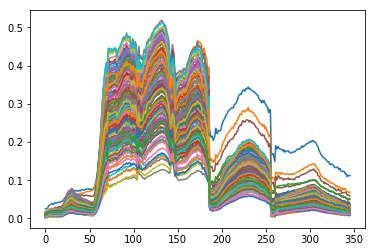

In [15]:
# Plotting the support vectors --> spectral signatures of the pixels that were chosen
sv=TrainedSVC_Class_1_2.support_vectors_
plt.plot(sv.T);

In [18]:
Validate = TrainedSVC_Class_1_2.predict(ValidSamps)

In [19]:
ValidSamps.shape

(664, 346)

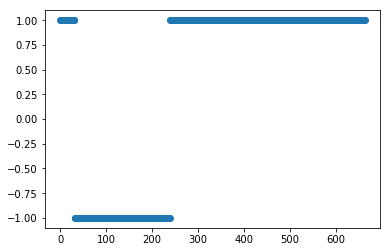

In [20]:
# Plot the result of the classifier for the validation data set
plt.figure()
plt.plot(Validate,"o");

In [23]:
# Calculate the score of the classifier for this pair
print('Mean accuracy: ',TrainedSVC_Class_1_2.score(ValidSamps,Targets_Val))

Mean accuracy:  0.951807228916


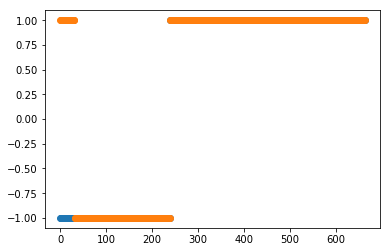

In [24]:
# Figure for the target and the validation data set
plt.figure()
plt.plot(Targets_Val,"o")
plt.plot(Validate,"o");